# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Michel\git2\LabsDataAnalyticsIronhack\module_2\Lab_2_Plotting_Multiple_Data_Series/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             128355 non-null  int64  
 1   Month            128355 non-null  int64  
 2   Supplier         128331 non-null  object 
 3   ItemCode         128355 non-null  object 
 4   Description      128355 non-null  object 
 5   ItemType         128354 non-null  object 
 6   RetailSales      128355 non-null  float64
 7   RetailTransfers  128355 non-null  float64
 8   WarehouseSales   128355 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.8+ MB


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [4]:
data_tot1 = data[["RetailSales", "RetailTransfers","WarehouseSales","ItemType"]].groupby(["ItemType"]).agg("sum")

<AxesSubplot:xlabel='ItemType'>

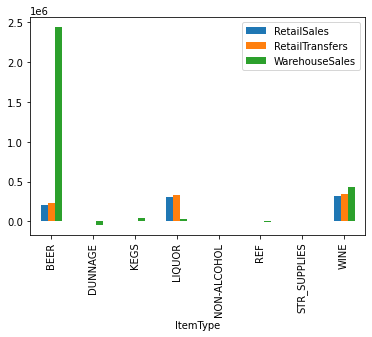

In [5]:
data_tot1.plot.bar()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [80]:
data_tot2 = data[["RetailSales","WarehouseSales","Supplier"]].groupby(["Supplier"]).agg("sum")
data_tot2['TotalSales'] = data_tot2['RetailSales']+data_tot2['WarehouseSales']

In [39]:
data_tot2=data_tot2.sort_values(by="TotalSales",ascending=False).head(10)

In [40]:
data_tot2

,RetailSales,WarehouseSales,TotalSales
Supplier,,,
MILLER BREWING COMPANY,35022.63,572623.41,607646.04
CROWN IMPORTS,26707.83,579824.70,606532.53
ANHEUSER BUSCH INC,42559.14,493856.19,536415.33
HEINEKEN USA,20923.17,318812.59,339735.76
E & J GALLO WINERY,67455.63,75594.99,143050.62
DIAGEO NORTH AMERICA INC,57656.36,54252.88,111909.24
CONSTELLATION BRANDS,54472.51,44968.76,99441.27
BOSTON BEER CORPORATION,10773.25,53420.91,64194.16
YUENGLING BREWERY,9628.35,53805.32,63433.67


<AxesSubplot:ylabel='Supplier'>

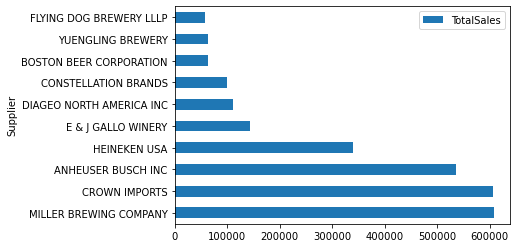

In [46]:
data_tot2.plot.barh(y="TotalSales")

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [72]:
data_tot3 = data[["RetailSales", "RetailTransfers","WarehouseSales","Month"]].groupby(["Month"]).agg("mean")
data_tot3

,RetailSales,RetailTransfers,WarehouseSales
Month,,,
1,5.679413,5.574833,19.072137
2,5.939247,6.050136,20.229658
4,0.000000,15.707503,0.000000
5,7.038838,7.421817,27.310548
6,7.143914,6.950396,27.839069
8,6.409991,6.584726,28.122641
9,6.757254,6.419721,22.817909
10,6.549021,6.827827,22.289367
11,6.765496,7.103699,23.348862


<AxesSubplot:xlabel='Month'>

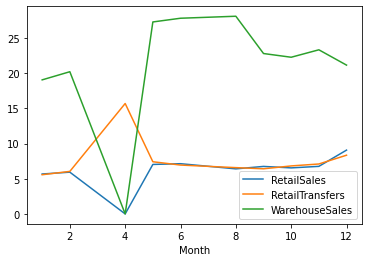

In [73]:
data_tot3.plot()

In [56]:
data_tot3 = data[["RetailSales", "RetailTransfers","WarehouseSales","Month"]].groupby(["Month"], as_index=False).agg("mean")
data_tot3

,Month,RetailSales,RetailTransfers,WarehouseSales
0,1,5.679413,5.574833,19.072137
1,2,5.939247,6.050136,20.229658
2,4,0.000000,15.707503,0.000000
3,5,7.038838,7.421817,27.310548
4,6,7.143914,6.950396,27.839069
5,8,6.409991,6.584726,28.122641
6,9,6.757254,6.419721,22.817909
7,10,6.549021,6.827827,22.289367
8,11,6.765496,7.103699,23.348862
9,12,9.078241,8.353759,21.169463


In [57]:
data_tot3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            10 non-null     int64  
 1   RetailSales      10 non-null     float64
 2   RetailTransfers  10 non-null     float64
 3   WarehouseSales   10 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 400.0 bytes


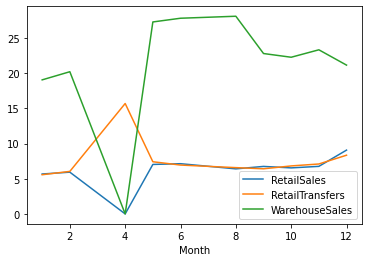

In [60]:
plt.plot(data_tot3['Month'],data_tot3['RetailSales'], label='RetailSales')
plt.plot(data_tot3['Month'],data_tot3['RetailTransfers'], label='RetailTransfers')
plt.plot(data_tot3['Month'],data_tot3['WarehouseSales'], label='WarehouseSales')

plt.xlabel('Month')
#plt.ylabel('y label')
#plt.title("2*x vs x^2")
plt.legend()
plt.show()

#Alternative to plot several lines easily
retail_item = pd.pivot_table(data, 
                             columns='ItemType', 
                             values='RetailSales',
                             index=['Year', 'Month'],
                             aggfunc=sum)
xticks = [f"{str(index[1])}\n{str(index[0])}" for index in data.groupby(['Year', 'Month']).groups.keys()]

#Plot
retail_item.plot(figsize=(14,8))

## 4. Plot the same information as above but as a bar chart.

<AxesSubplot:xlabel='Month'>

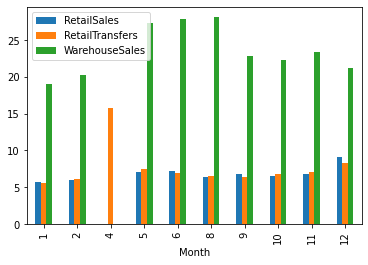

In [74]:
data_tot3.plot.bar()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [91]:
data_tot4 = data[["RetailSales","ItemType","Month","Year"]].groupby(["ItemType","Month","Year"],as_index=False).agg("sum")
data_tot4

,ItemType,Month,Year,RetailSales
0,BEER,1,2018,16606.33
1,BEER,2,2018,18640.31
2,BEER,4,2017,0.00
3,BEER,5,2017,25023.24
4,BEER,6,2017,27863.26
...,...,...,...,...
68,WINE,8,2017,30707.45
69,WINE,9,2017,32936.89
70,WINE,10,2017,33108.76
71,WINE,11,2017,38275.92


<AxesSubplot:>

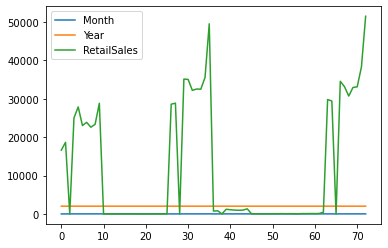

In [95]:
data_tot4.plot()

In [96]:
data_tot5 = data[["RetailSales","ItemType","Month","Year"]].groupby(["ItemType","Month","Year"],as_index=True).agg("sum")
data_tot5

RetailSales
ItemType Month Year             
BEER     1     2018     16606.33
         2     2018     18640.31
         4     2017         0.00
         5     2017     25023.24
         6     2017     27863.26
...                          ...
WINE     8     2017     30707.45
         9     2017     32936.89
         10    2017     33108.76
         11    2017     38275.92
         12    2017     51492.76

[73 rows x 1 columns]

In [100]:
data_tot5.reset_index(level='ItemType')

,,ItemType,RetailSales
Month,Year,,
1,2018,BEER,16606.33
2,2018,BEER,18640.31
4,2017,BEER,0.00
5,2017,BEER,25023.24
6,2017,BEER,27863.26
...,...,...,...
8,2017,WINE,30707.45
9,2017,WINE,32936.89
10,2017,WINE,33108.76


<AxesSubplot:xlabel='ItemType,Month,Year'>

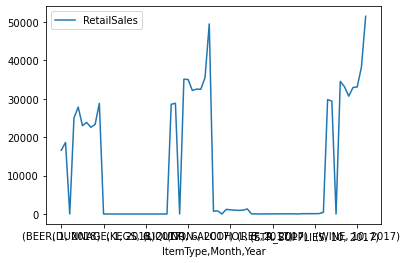

In [107]:
data_tot5.plot()

<AxesSubplot:xlabel='Year,Month'>

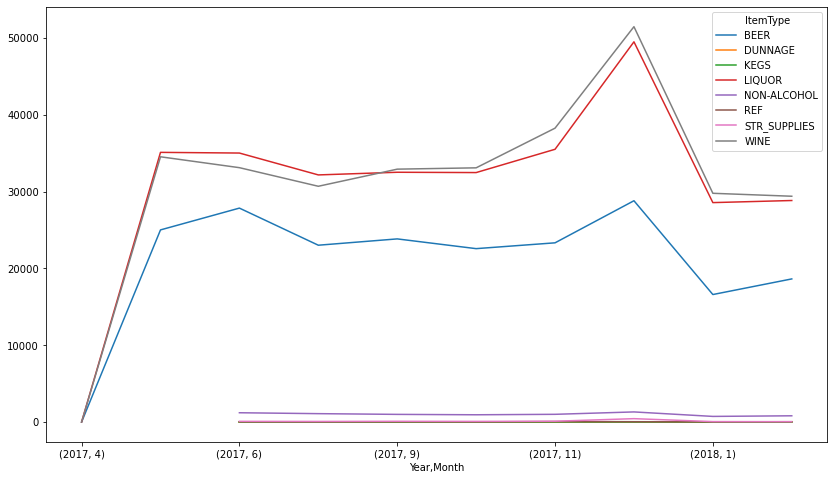

In [105]:
retail_item = pd.pivot_table(data_tot5, 
                             columns='ItemType', 
                             values='RetailSales',
                             index=['Year', 'Month'],
                             aggfunc=sum)
#xticks = [f"{str(index[1])}\n{str(index[0])}" for index in data.groupby(['Year', 'Month']).groups.keys()]

#Plot
retail_item.plot(figsize=(14,8))

## 6. Plot the same information as above but as a bar chart.

<AxesSubplot:xlabel='Year,Month'>

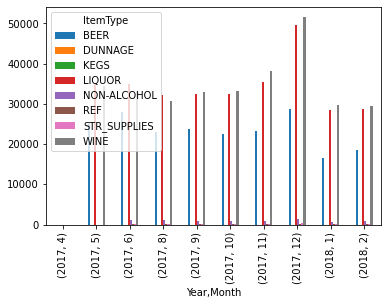

In [108]:
retail_item.plot.bar()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

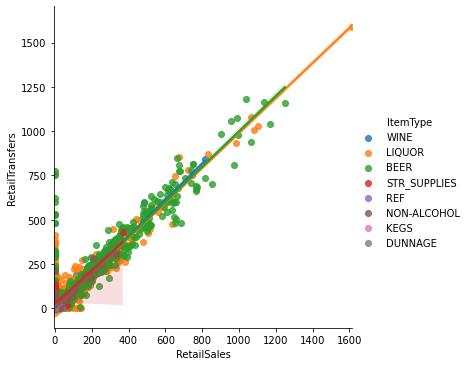

In [115]:
sns.lmplot(x='RetailSales',y='RetailTransfers', hue="ItemType", data=data)

<AxesSubplot:xlabel='RetailSales', ylabel='RetailTransfers'>

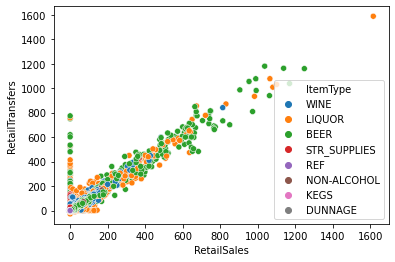

In [113]:
sns.scatterplot(x='RetailSales',y='RetailTransfers', hue="ItemType", data=data)

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Month', ylabel='Year'>,
        <AxesSubplot:xlabel='RetailSales', ylabel='Year'>,
        <AxesSubplot:xlabel='RetailTransfers', ylabel='Year'>,
        <AxesSubplot:xlabel='WarehouseSales', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Month'>,
        <AxesSubplot:xlabel='Month', ylabel='Month'>,
        <AxesSubplot:xlabel='RetailSales', ylabel='Month'>,
        <AxesSubplot:xlabel='RetailTransfers', ylabel='Month'>,
        <AxesSubplot:xlabel='WarehouseSales', ylabel='Month'>],
       [<AxesSubplot:xlabel='Year', ylabel='RetailSales'>,
        <AxesSubplot:xlabel='Month', ylabel='RetailSales'>,
        <AxesSubplot:xlabel='RetailSales', ylabel='RetailSales'>,
        <AxesSubplot:xlabel='RetailTransfers', ylabel='RetailSales'>,
        <AxesSubplot:xlabel='WarehouseSales', ylabel='RetailSales'>],
       [<AxesSubplot:xlabel='Year', ylabel='RetailTransfers'>,
        <AxesSubplot:xlabel

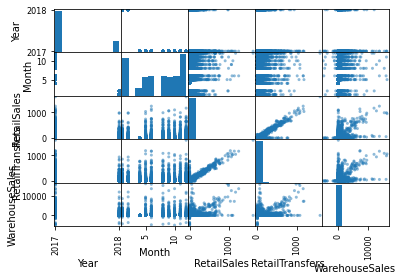

In [109]:
pd.plotting.scatter_matrix(data)

<AxesSubplot:xlabel='RetailSales', ylabel='RetailTransfers'>

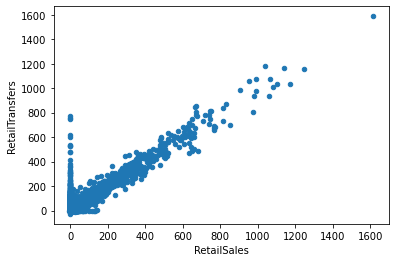

In [110]:
data.plot.scatter(x='RetailSales',y='RetailTransfers')

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

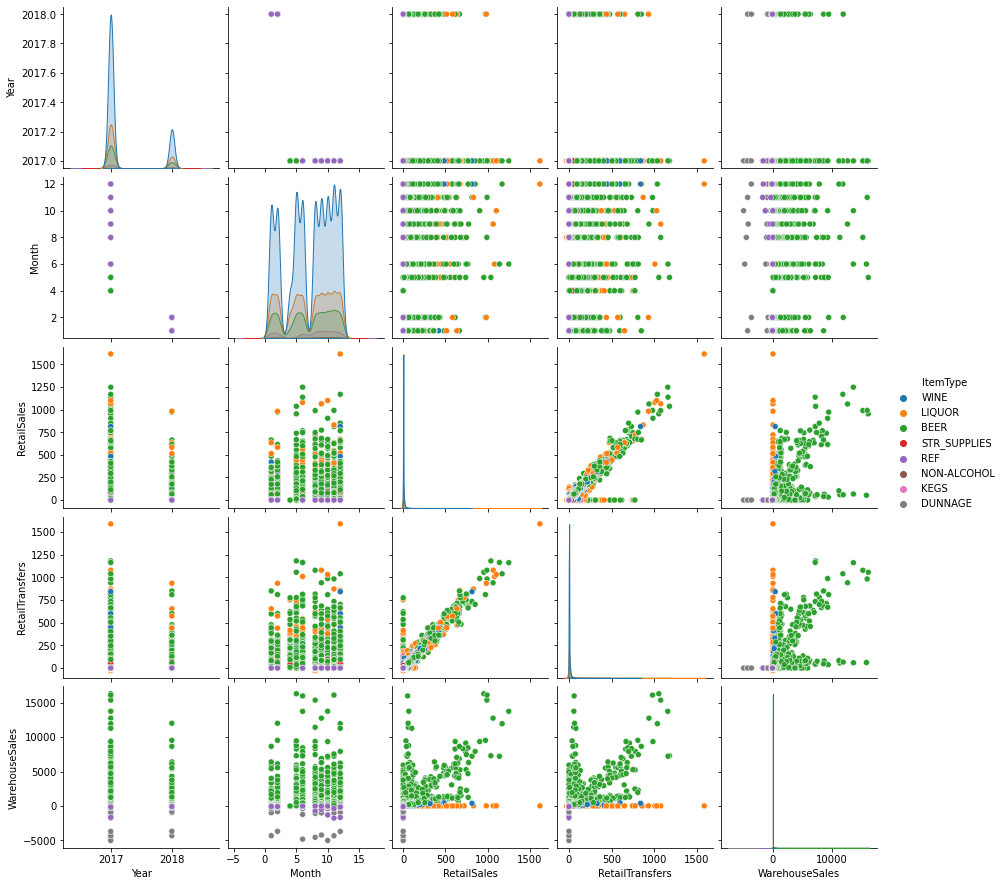

In [119]:
sns.pairplot(data,hue="ItemType")